<a href="https://colab.research.google.com/github/njorogewacira001/.py/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

Cryptocurrency price prediction is a challenging task due to the volatile nature and complexity of the cryptocurrency market. However, accurate predictions can help traders and investors make informed decisions. Long Short-Term Memory (LSTM) models, a type of Recurrent Neural Network (RNN), have proven effective in time series forecasting, making them suitable for predicting cryptocurrency prices.

 **Importance of Cryptocurrency Price Prediction:**

Predicting cryptocurrency prices accurately can have significant implications for traders, investors, and other stakeholders in the market. It enables them to make informed investment decisions, manage risks, and potentially capitalize on market opportunities. Furthermore, understanding the factors influencing cryptocurrency prices can provide valuable insights into market trends and dynamics.

**Objectives of the Notebook:**

This notebook aims to analyze historical cryptocurrency data, identify patterns and trends, and develop an LSTM model to predict future cryptocurrency prices. Specifically, we will:

1. Explore and visualize historical cryptocurrency data.
2. Preprocess the data for LSTM model input.
3. Build an LSTM model for price prediction.
4. Train and evaluate the model's performance.
5. Analyze the model's predictions and compare them with actual values.
6. Identify potential limitations and suggest improvements for future research.

**Below is Breakdown of our task**

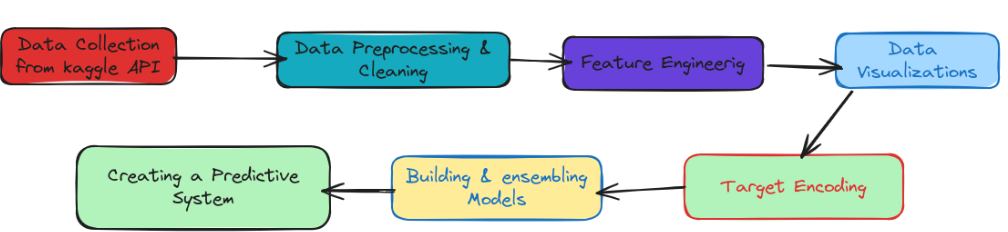

In [1]:
#instllation of Libraries
!pip install kaggle
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


# **Data Collection from Kaggle API**



In [2]:
#Upload kaggle json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gavinnjoroge","key":"2f18ff2a48d5df12589ada8adc591655"}'}

In [3]:
!ls /content


'kaggle (1).json'   kaggle.json   sample_data


In [4]:
# from google.colab import userdata
# userdata.get('gavinnjoroge')

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

In [7]:
#download the dataset using kaggle API
!kaggle datasets download -d sudalairajkumar/cryptocurrency-historical-prices-coingecko --force

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko
License(s): copyright-authors
  0% 0.00/2.95M [00:00<?, ?B/s]
100% 2.95M/2.95M [00:00<00:00, 115MB/s]


# Data Loading

In [8]:
from google.colab import files
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
print('imported all libraries to use in price prediction')

imported all libraries to use in price prediction


In [9]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/cryptocurrency-historical-prices-coingecko.zip'
# Path to extract the files
extract_path = '/content/cryptocurrency-historical-prices-coingecko'
# Create a directory to extract the files
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['tezos.csv', 'ethereum-classic.csv', 'chiliz.csv', 'dai.csv', 'hedera-hashgraph.csv', 'leo-token.csv', 'frax.csv', 'cosmos.csv', 'solana.csv', 'apecoin.csv', 'filecoin.csv', 'chain-2.csv', 'uniswap.csv', 'shiba-inu.csv', 'polkadot.csv', 'tether.csv', 'theta-token.csv', 'lido-dao.csv', 'usd-coin.csv', 'decentraland.csv', 'wrapped-bitcoin.csv', 'bitcoin.csv', 'internet-computer.csv', 'okb.csv', 'ripple.csv', 'the-sandbox.csv', 'vechain.csv', 'monero.csv', 'chainlink.csv', 'quant-network.csv', 'stellar.csv', 'terra-luna.csv', 'near.csv', 'ftx-token.csv', 'flow.csv', 'litecoin.csv', 'algorand.csv', 'bitcoin-cash.csv', 'staked-ether.csv', 'crypto-com-chain.csv', 'binancecoin.csv', 'ethereum.csv', 'avalanche-2.csv', 'eos.csv', 'cardano.csv', 'axie-infinity.csv', 'binance-usd.csv', 'tron.csv', 'matic-network.csv', 'dogecoin.csv']


In [10]:
# Path to the CSV file within the extracted directory
csv_file_path = '/content/cryptocurrency-historical-prices-coingecko/data.csv'

In [11]:
print(csv_file_path)


/content/cryptocurrency-historical-prices-coingecko/data.csv


In [12]:
#load the extrated dataset
# the CSV file name
file_name = '/content/data/data.csv'


# **Data Prepocessing And Cleaning**

In [13]:
import os
import glob
import pandas as pd

# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file, index_col=0)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)

# Reset the index for a clean numbering of rows
merged_df.reset_index(drop=True, inplace=True)



In [14]:
# Print the first few rows and columns of the DataFrame

print(merged_df.columns)


Index(['price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')


In [15]:
df.head()

,price,total_volume,market_cap,coin_name
date,,,,
2015-01-01 00:00:00.000,0.000183,283845.500641,1.780332e+07,dogecoin
2015-01-02 00:00:00.000,0.000184,363741.739089,1.784733e+07,dogecoin
2015-01-03 00:00:00.000,0.000168,270052.236025,1.632320e+07,dogecoin
2015-01-04 00:00:00.000,0.000158,353697.860482,1.538501e+07,dogecoin
2015-01-05 00:00:00.000,0.000160,554935.735782,1.560247e+07,dogecoin


In [16]:
df.tail()

,price,total_volume,market_cap,coin_name
date,,,,
2024-03-23 00:00:00.000,0.152094,2.940855e+09,2.180657e+10,dogecoin
2024-03-24 00:00:00.000,0.162450,3.048335e+09,2.333280e+10,dogecoin
2024-03-25 00:00:00.000,0.176653,3.003672e+09,2.538381e+10,dogecoin
2024-03-26 00:00:00.000,0.175062,2.788814e+09,2.510351e+10,dogecoin
2024-03-27 00:00:00.000,0.182529,3.062788e+09,2.614014e+10,dogecoin


In [17]:
print(merged_df.head())

      price  total_volume    market_cap coin_name
0  2.937866  3.172538e+06  0.000000e+00     tezos
1  2.047985  1.426545e+07  0.000000e+00     tezos
2  1.969392  6.492796e+06  1.196384e+09     tezos
3  1.528033  8.681129e+06  9.282631e+08     tezos
4  1.796304  1.617507e+07  1.091235e+09     tezos


In [18]:
print(merged_df.tail())

          price  total_volume    market_cap coin_name
98823  0.152094  2.940855e+09  2.180657e+10  dogecoin
98824  0.162450  3.048335e+09  2.333280e+10  dogecoin
98825  0.176653  3.003672e+09  2.538381e+10  dogecoin
98826  0.175062  2.788814e+09  2.510351e+10  dogecoin
98827  0.182529  3.062788e+09  2.614014e+10  dogecoin


In [19]:
print("Number of unique coins:", merged_df['coin_name'].nunique())


Number of unique coins: 50


In [20]:
print("Length of df_list:", len(df_list))

Length of df_list: 50


In [21]:
print("Shape of merged_df:", merged_df.shape)

Shape of merged_df: (98828, 4)


In [22]:
# check the null values
df.isnull().sum()

price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

In [23]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float', 'int']).columns
X_train = df[num_cols]

In [24]:
# Handle missing values
X_train = X_train.fillna(0)

In [25]:
# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)



In [26]:
merged_df['coin_name'].nunique()

50

In [27]:
merged_df.nunique()

date             5529
price           97799
total_volume    98759
market_cap      95983
coin_name          50
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3373 non-null   object 
 1   price         3373 non-null   float64
 2   total_volume  3373 non-null   float64
 3   market_cap    3372 non-null   float64
 4   coin_name     3373 non-null   object 
dtypes: float64(3), object(2)
memory usage: 131.9+ KB


In [29]:
df['price'] = df['price'].astype(np.float32)
df['total_volume'] = df['total_volume'].astype(np.float32)
df['market_cap'] = df['market_cap'].astype(np.float32)


In [30]:
df['date'] = df.index  # Create a new 'date' column with the DataFrame index
df['date'] = pd.to_datetime(df['date'])  # Convert it to datetime format


In [31]:
df.drop_duplicates(inplace=True)


# Feature Engineering

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Check for missing values in each column
print(merged_df.isna().sum())

# Drop rows with missing values
merged_df.dropna(inplace=True)




date            0
price           0
total_volume    0
market_cap      5
coin_name       0
dtype: int64


In [33]:
merged_df.index = pd.to_datetime(merged_df.index, errors='coerce')
merged_df['date'] = merged_df.index


In [34]:
# Scale numeric values in specific columns to a range between 0 and 1
scaler = MinMaxScaler()
numeric_cols = ['price', 'total_volume', 'market_cap']
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

In [35]:
# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)




In [36]:
# Check the number of unique values in the 'coin_name' column
print(merged_df['coin_name'].nunique())

50


In [37]:
df.isna().sum()*100/df.shape[0]

date            0.000000
price           0.000000
total_volume    0.000000
market_cap      0.029647
coin_name       0.000000
dtype: float64

# Data Visualizations

In [38]:
#  Display the descriptive statistics
print(df.describe())

             price  total_volume    market_cap
count  3373.000000  3.373000e+03  3.372000e+03
mean      0.044918  6.781944e+08  5.994437e+09
std       0.079998  2.592617e+09  1.054380e+10
min       0.000087  8.554881e+03  8.628938e+06
25%       0.000524  1.480875e+06  5.854319e+07
50%       0.002890  6.473532e+07  3.479060e+08
75%       0.069671  4.272761e+08  9.597670e+09
max       0.681842  5.096065e+10  8.879477e+10


In [39]:
# Display the class label distribution
print(df['price'].value_counts())

price
0.000183    1
0.058674    1
0.055135    1
0.056612    1
0.053532    1
           ..
0.004425    1
0.005071    1
0.004400    1
0.003461    1
0.182529    1
Name: count, Length: 3373, dtype: int64


In [40]:
print(df['total_volume'].value_counts())

total_volume
2.838455e+05    1
1.451939e+09    1
3.342539e+09    1
2.723242e+09    1
3.430334e+09    1
               ..
2.372859e+07    1
1.543166e+07    1
9.786740e+06    1
8.811903e+06    1
3.062788e+09    1
Name: count, Length: 3373, dtype: int64


In [41]:
print(df['market_cap'].value_counts())

market_cap
1.780332e+07    1
7.556338e+09    1
7.082310e+09    1
7.345301e+09    1
6.873239e+09    1
               ..
5.001272e+08    1
5.732401e+08    1
4.974411e+08    1
3.913777e+08    1
2.614014e+10    1
Name: count, Length: 3372, dtype: int64


<Axes: ylabel='Frequency'>

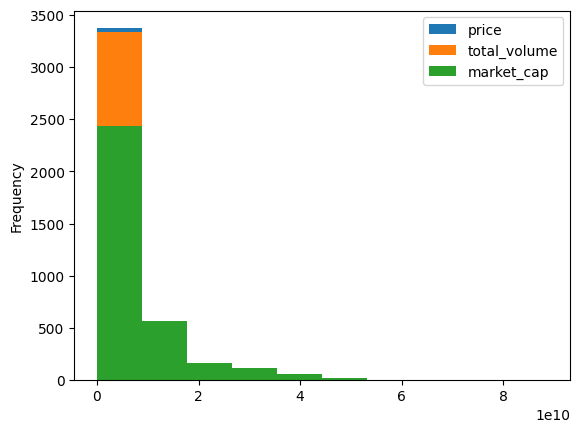

In [42]:
df.plot(kind='hist')

<Axes: >

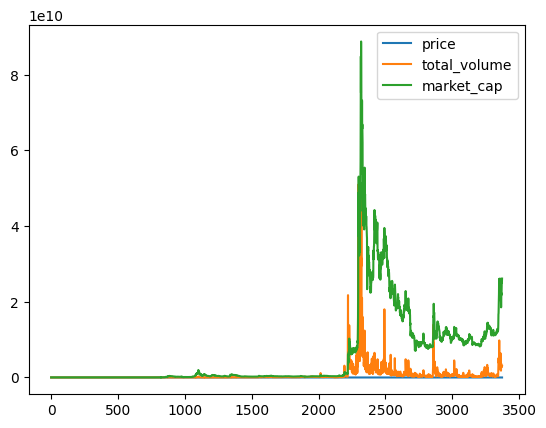

In [43]:
df.plot()

<Axes: >

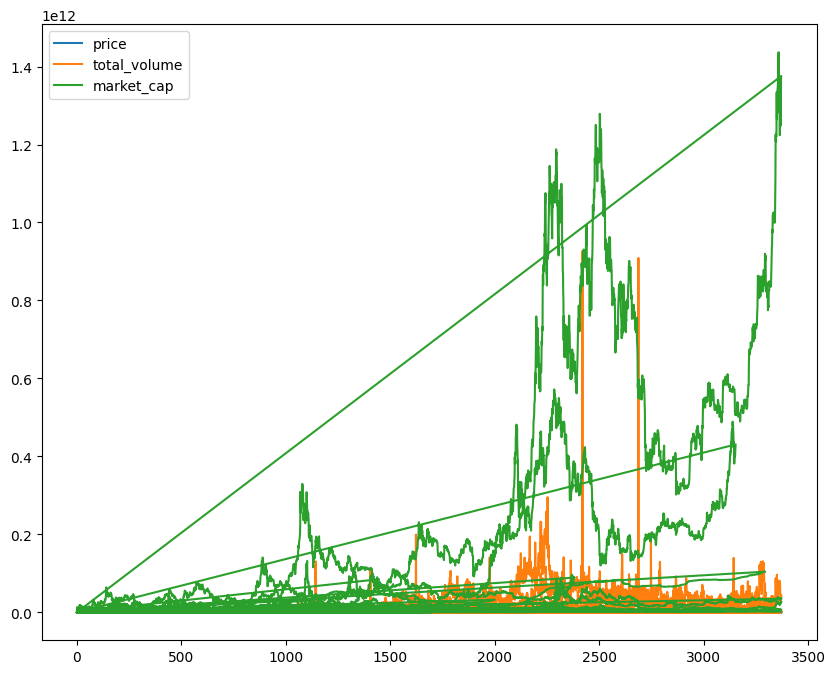

In [44]:


# Plot the entire DataFrame
merged_df.plot(kind='line', figsize=(10, 8))


<Axes: xlabel='date'>

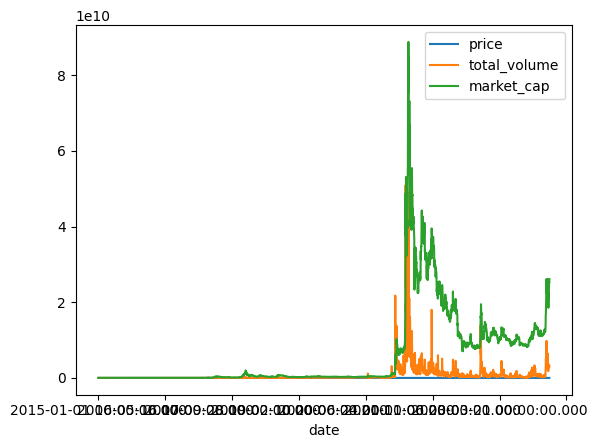

In [45]:
df.plot (kind='line', x='date', y= ['price', 'total_volume', 'market_cap'])

<Axes: xlabel='date'>

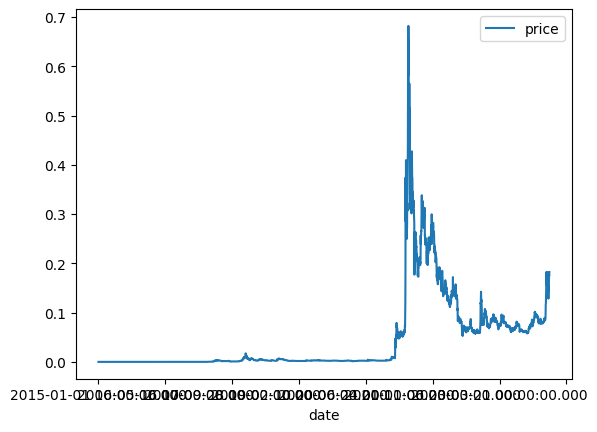

In [46]:
df.plot (kind='line', x='date', y= ['price'])

<Axes: xlabel='date'>

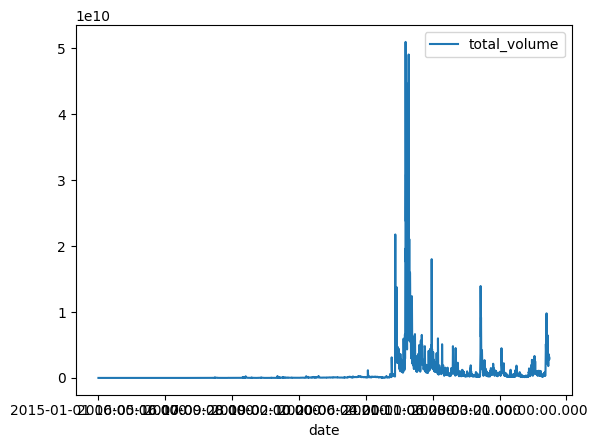

In [47]:
df.plot (kind='line', x='date', y= ['total_volume'])

<Axes: xlabel='date'>

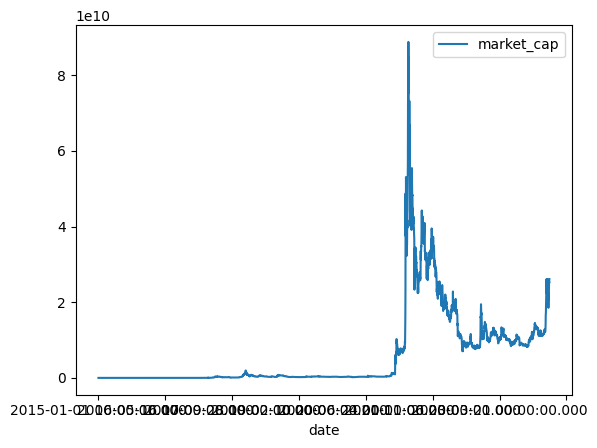

In [48]:

  df.plot (kind='line', x='date', y= ['market_cap'])


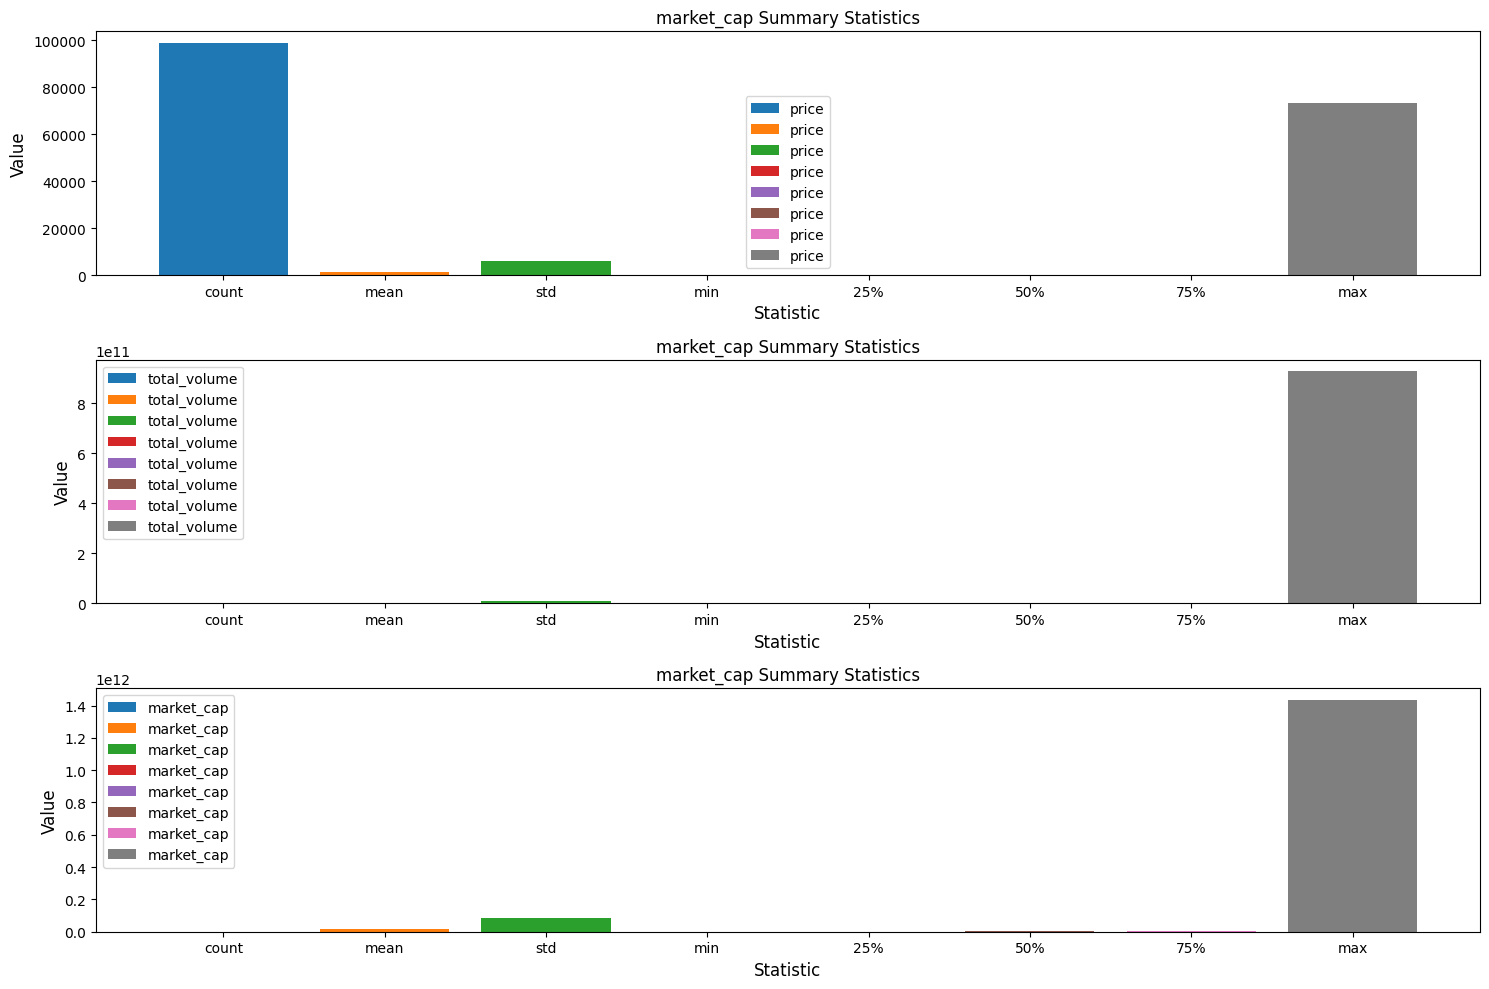

In [49]:

# Create a figure with 3 subplots (one for each statistic)
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot each statistic on a separate subplot
for i, column in enumerate(['price', 'total_volume', 'market_cap']):
    for stat, value in merged_df[column].describe().items():
        axes[i].bar(stat, value, label=column)

# Add titles, labels, and font properties
for ax in axes:
    ax.set_title(f'{column} Summary Statistics')
    ax.set_xlabel('Statistic', fontdict={'family': 'Arial', 'size': 12})
    ax.set_ylabel(f'Value', fontdict={'family': 'Arial', 'size': 12})
    ax.legend()

# Show the bar charts
plt.tight_layout()
plt.show()


In [50]:
merged_df.columns

Index(['date', 'price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')

In [51]:
merged_df.set_index('price', inplace=True)


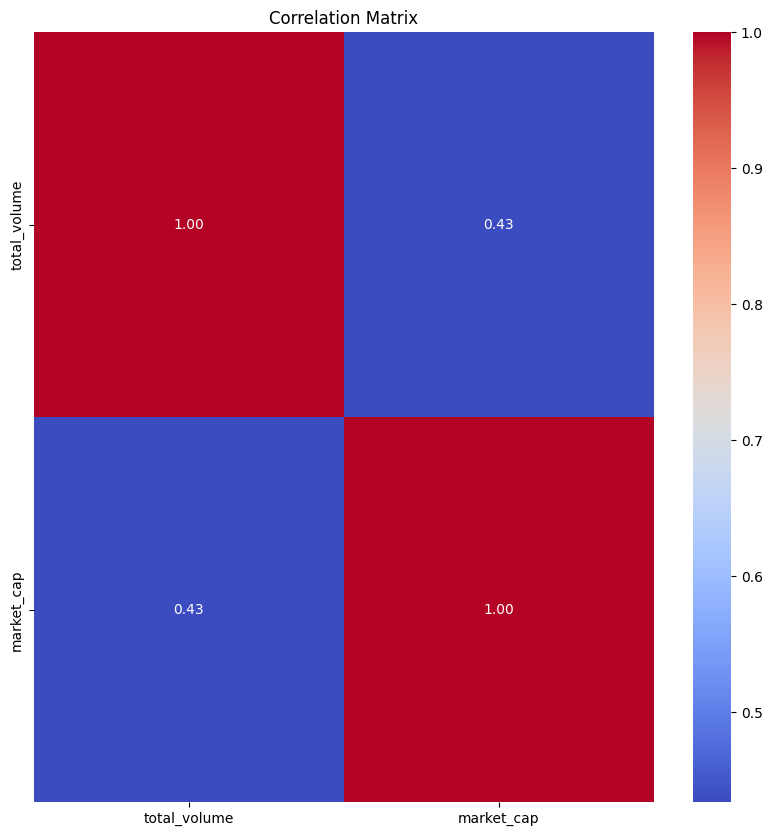

In [52]:
import seaborn as sns
import pandas as pd

# Identify numeric columns
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns

# Create a correlation matrix using only numeric columns
correlation_matrix = merged_df[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Target Encoding**

In [53]:
from category_encoders.target_encoder import TargetEncoder


In [54]:
print(df.columns)


Index(['date', 'price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')


In [55]:
# # Drop the "date" column
# df = df.drop(columns=['date'])

# # Check the columns of the DataFrame
# print(df.columns)


In [56]:
columns = ['coin_name']


In [57]:
columns = ['coin_name']
for col in columns:
    encoder = TargetEncoder()
    df[col] = encoder.fit_transform(X=df[[col]], y=df['price'])


In [58]:
df['date'] = pd.to_datetime(df['date']).astype(int) // 10 ** 9


In [59]:
df.head()

,date,price,total_volume,market_cap,coin_name
0,1420070400,0.000183,283845.500641,1.780332e+07,0.044918
1,1420156800,0.000184,363741.739089,1.784733e+07,0.044918
2,1420243200,0.000168,270052.236025,1.632320e+07,0.044918
3,1420329600,0.000158,353697.860482,1.538501e+07,0.044918
4,1420416000,0.000160,554935.735782,1.560247e+07,0.044918


In [60]:
df.tail()

,date,price,total_volume,market_cap,coin_name
3368,1711152000,0.152094,2.940855e+09,2.180657e+10,0.044918
3369,1711238400,0.162450,3.048335e+09,2.333280e+10,0.044918
3370,1711324800,0.176653,3.003672e+09,2.538381e+10,0.044918
3371,1711411200,0.175062,2.788814e+09,2.510351e+10,0.044918
3372,1711497600,0.182529,3.062788e+09,2.614014e+10,0.044918


# **Building a Model**

In [61]:
# Display the class label distribution
print(df['price'].value_counts())

price
0.000183    1
0.058674    1
0.055135    1
0.056612    1
0.053532    1
           ..
0.004425    1
0.005071    1
0.004400    1
0.003461    1
0.182529    1
Name: count, Length: 3373, dtype: int64


In [62]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))

In [63]:
scaled_data = scaler.fit_transform(df['price'].values.reshape(-1,1))

# **Train Test Split**

In [64]:
# Define window size for LSTM model
window_size = 120

In [65]:
# Split the data into training and testing sets
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [67]:
# Define num_cols
num_cols = ["price", "total_volume", "market_cap"]

# Fill missing values with 0
X_test = df[num_cols].fillna(0)

# Fit and transform the scaler on X_test
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)


In [68]:
X_test = df[num_cols]
X_test = X_test.fillna(0)
X_test = scaler.transform(X_test)

In [69]:
# Normalize the features
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#_test = scaler.transform(X_test)

In [70]:
# Create sequences of data for LSTM model
X, y = [], []
for i in range(window_size, len(df)):
    X.append(scaled_data[i-window_size:i, :])
    y.append(scaled_data[i, 0])
    # Create sequences of data for LSTM model
X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

In [71]:
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [73]:
X_train.shape

(2698, 1, 120, 1)

In [74]:
X_test


array([[[[0.12651203],
         [0.12290447],
         [0.12271067],
         ...,
         [0.08849284],
         [0.09124849],
         [0.08436157]]],


       [[[0.12290447],
         [0.12271067],
         [0.12260664],
         ...,
         [0.09124849],
         [0.08436157],
         [0.08599835]]],


       [[[0.12271067],
         [0.12260664],
         [0.11547993],
         ...,
         [0.08436157],
         [0.08599835],
         [0.08570197]]],


       ...,


       [[[0.11556854],
         [0.11511236],
         [0.11540954],
         ...,
         [0.22810489],
         [0.22296405],
         [0.23815541]]],


       [[[0.11511236],
         [0.11540954],
         [0.11824176],
         ...,
         [0.22296405],
         [0.23815541],
         [0.2589884 ]]],


       [[[0.11540954],
         [0.11824176],
         [0.11783555],
         ...,
         [0.23815541],
         [0.2589884 ],
         [0.25665408]]]])

In [75]:
y_test

array([[0.08599835],
       [0.08570197],
       [0.08420508],
       [0.08758277],
       [0.09283459],
       [0.09283222],
       [0.08987262],
       [0.08953333],
       [0.08884891],
       [0.08908984],
       [0.08897971],
       [0.09040422],
       [0.08887847],
       [0.08689925],
       [0.08840188],
       [0.09689353],
       [0.09468356],
       [0.09301501],
       [0.0906234 ],
       [0.09031982],
       [0.09101699],
       [0.08719911],
       [0.08829564],
       [0.08778963],
       [0.08742573],
       [0.08595622],
       [0.08583661],
       [0.08626053],
       [0.08800002],
       [0.08776207],
       [0.08600305],
       [0.08718754],
       [0.08700535],
       [0.08751495],
       [0.08841811],
       [0.08709776],
       [0.09189715],
       [0.10655151],
       [0.11312466],
       [0.12326328],
       [0.1758246 ],
       [0.17231751],
       [0.18581667],
       [0.2088892 ],
       [0.18745251],
       [0.17953558],
       [0.18468619],
       [0.182

In [76]:
# Define Early Stopping Callback

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [77]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

In [78]:
# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_train, y_train), callbacks=[early_stopping])


Epoch 1/100
85/85 [==============================] - 14s 42ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 2/100
85/85 [==============================] - 2s 19ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 3/100
85/85 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 8.1050e-04
Epoch 4/100
85/85 [==============================] - 1s 11ms/step - loss: 9.9874e-04 - val_loss: 5.6700e-04
Epoch 5/100
85/85 [==============================] - 1s 11ms/step - loss: 9.4328e-04 - val_loss: 6.4325e-04
Epoch 6/100
85/85 [==============================] - 1s 14ms/step - loss: 7.6780e-04 - val_loss: 5.7878e-04
Epoch 7/100
85/85 [==============================] - 1s 16ms/step - loss: 7.6308e-04 - val_loss: 4.3397e-04
Epoch 8/100
85/85 [==============================] - 1s 12ms/step - loss: 7.5837e-04 - val_loss: 4.9617e-04
Epoch 9/100
85/85 [==============================] - 1s 16ms/step - loss: 6.8978e-04 - val_loss: 3.8136e-04
Epoch 10/100
85/85 [===========================

In [79]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"MSE: {loss}")

18/18 [==============================] - 0s 4ms/step - loss: 1.5999e-04
MSE: 0.0001599903916940093


In [80]:
from sklearn.metrics import r2_score

# Assuming 'model' is your trained regression model
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
percentage_accuracy = r_squared * 100
print(f"R-squared: {r_squared}")
print(f"Percentage Accuracy: {percentage_accuracy}%")


18/18 [==============================] - 1s 2ms/step
R-squared: 0.8472523844762545
Percentage Accuracy: 84.72523844762546%


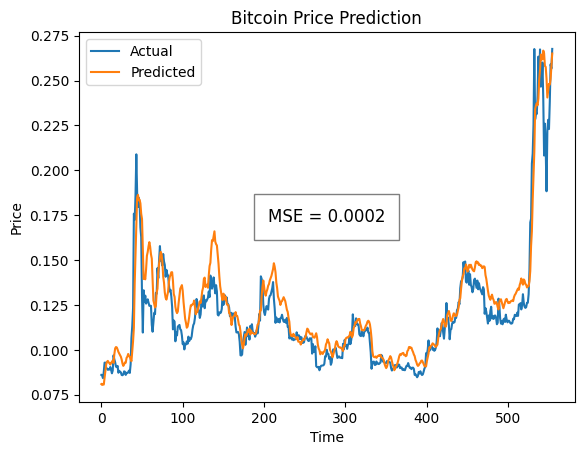

In [90]:
import matplotlib.pyplot as plt

# ... Your existing code for data preparation, model training, and predictions ...
# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Calculate MSE and format it to 4 decimal places
mse = float(mean_squared_error(y_test, predictions))
mse_formatted = "{:.4f}".format(mse)

# Add a text box with the MSE
plt.text(0.5, 0.5, f"MSE = {mse_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()

In [82]:
# Assuming you already have calculated the MSE and stored it in the variable 'loss'
mse = loss

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.012648730833329062


In [83]:
# Assuming you have predictions generated by your model stored in a variable named 'predictions'
predictions = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)/
mae = np.mean(np.abs(y_test - predictions))
print("Mean Absolute Error (MAE):", mae)


18/18 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.00903572113827207


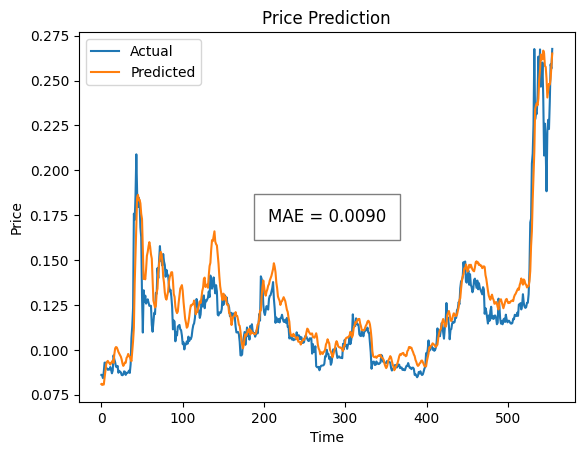

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate MAE and format it to 4 decimal places
mae = float(np.mean(np.abs(y_test - predictions)))
mae_formatted = "{:.4f}".format(mae)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the MAE
plt.text(0.5, 0.5, f"MAE = {mae_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [84]:

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = 100 * np.mean(np.abs((y_test - predictions) / y_test))
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 7.454969344023481


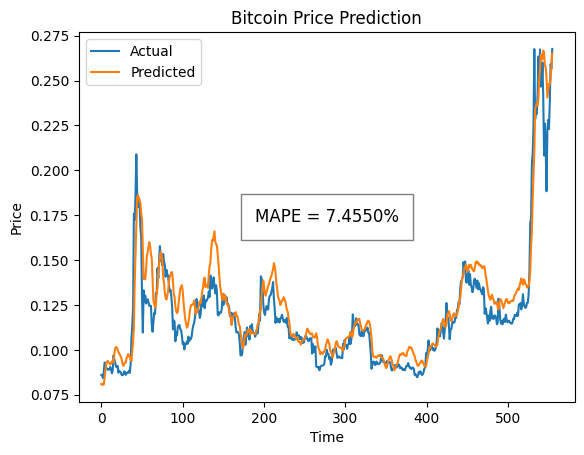

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate MAPE and format it to 4 decimal places
mape = float(np.mean(np.abs((y_test - predictions) / y_test))) * 100
mape_formatted = "{:.4f}".format(mape)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the MAPE
plt.text(0.5, 0.5, f"MAPE = {mape_formatted}%", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [85]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predictions)
print("R-squared (R2) score:", r2_score)

R-squared (R2) score: 0.8472523844762545


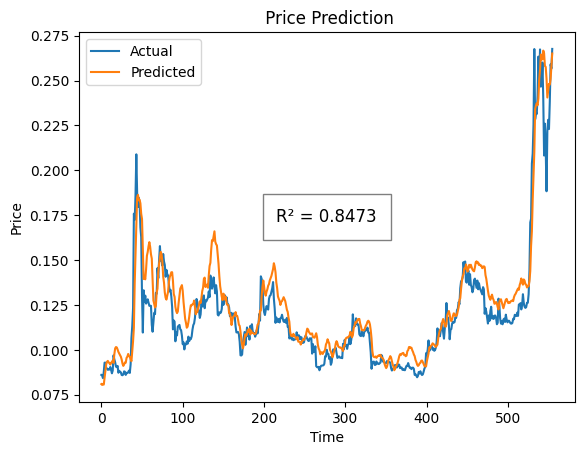

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate R² and format it to 4 decimal places
r2 = r2_score(y_test, predictions)
r2_formatted = "{:.4f}".format(r2)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title(' Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the R² score
plt.text(0.5, 0.5, f"R² = {r2_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


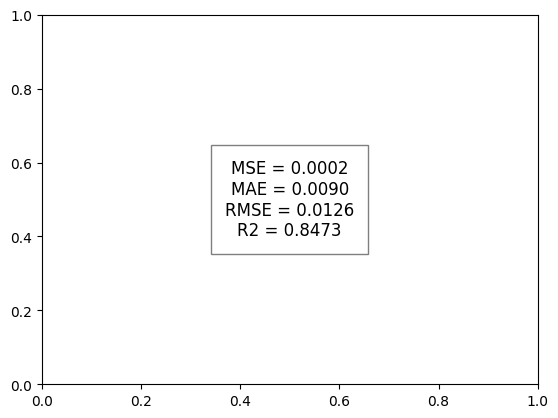

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... Your existing code ...
mse = float(mean_squared_error(y_test, predictions))
mae = float(mean_absolute_error(y_test, predictions))
rmse = float(np.sqrt(mean_squared_error(y_test, predictions)))
r2 = float(r2_score(y_test, predictions))

plt.text(0.5, 0.5, f"MSE = {mse:.4f}\nMAE = {mae:.4f}\nRMSE = {rmse:.4f}\nR2 = {r2:.4f}",
         transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()


In [97]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true values and predictions contains the predicted values
# Convert the values into a binary classification problem (0 or 1)
# For example, if y_test and predictions contain the change in price:
y_test_binary = np.where(y_test > 0, 1, 0)  # 1 if price increases, 0 otherwise
predictions_binary = np.where(predictions > 0, 1, 0)  # 1 if predicted price increases, 0 otherwise
accuracy = accuracy_score(y_test_binary, predictions_binary)
print("Accuracy score:", accuracy)


Accuracy score: 1.0


In [101]:
# Convert the predictions into binary labels using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary = np.where(predictions > threshold, 1, 0)


In [105]:
y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 1, 0]
def calculate_f1_score(y_true, y_pred):
  f1 = f1_score(y_true, y_pred, average='macro')
  return f1

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 1, 0]

f1_score = calculate_f1_score(y_true, y_pred)
print('F1 score:', f1_score)

F1 score: 0.4


In [111]:
print("Shape of y_true:", y_true.shape)
print("Shape of y_pred_binary:", y_pred_binary.shape)


Shape of y_true: (5,)
Shape of y_pred_binary: (555, 1)


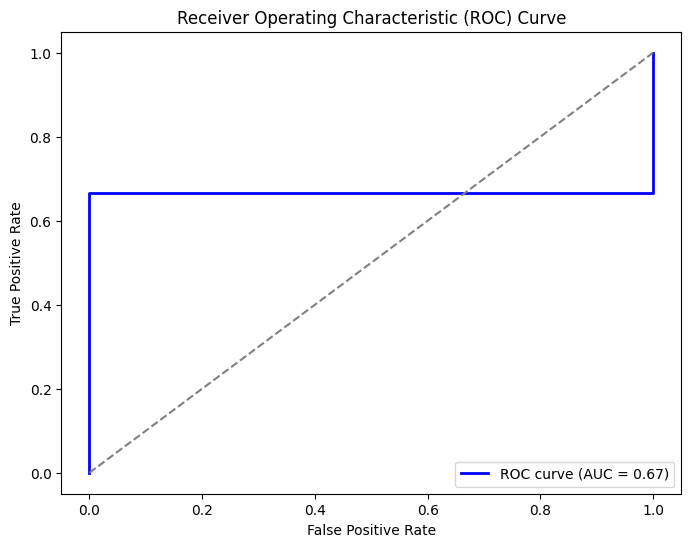

Area under ROC curve: 0.6666666666666666


In [114]:
# Assuming predictions are probabilities for the positive class
positive_class_probabilities = predictions.squeeze()  # Squeeze the predictions array if it has shape (n_samples, 1)

# Slice positive_class_probabilities to match the length of y_true
positive_class_probabilities = positive_class_probabilities[:len(y_true)]

# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(y_true, positive_class_probabilities)

# Calculate the Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_true, positive_class_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Area under ROC curve:", roc_auc)


In [ ]:
features = ['price', 'total_volume', 'market_cap']


In [ ]:

def predict_price(details):
    # Convert the details to a DataFrame
    df = pd.DataFrame(data=[details], columns=features)

    # Preprocess the details in the same way as the training data
    details = scaler.transform(df)

    # Use the trained model to make a prediction
    prediction = model.predict(details)

    # Scale back the prediction to the original scale
    prediction = scaler.inverse_transform(prediction)

    # Display a message
    print(f"Predicted price: {prediction[0]:.4f}")

    return prediction[0]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names
features = ['RSI', 'SMA', 'EMA']

# Importance scores (assuming these are the values from the image)
importance_scores = np.array([0.00009, 0.01294, 0.00411])

# Technical indicators importance score (from the image)
tech_indicators_importance = 0.01294

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Flatten the importance scores
importance_scores = importance_scores.flatten()

# Plot the importance scores as horizontal bars with thin width
ax.barh(range(len(features)), importance_scores, align='center', height=0.5)

# Set the y-ticks and labels
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)

# Add a vertical line for the technical indicators importance
ax.axvline(x=tech_indicators_importance, color='b', linestyle='--', label='Technical Indicators')

# Add labels and title
ax.set_xlabel('Importance Scores')
ax.set_ylabel('Features')
ax.set_title('Feature Importance of Random Forest', y=1.08)  # Adjust the title position

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
model.save('final_model.h5')

In [ ]:
import pickle

# Define the file name to save the model
filename = 'predictor.pkl'

# Open the file in write-binary mode
with open(filename, 'wb') as file:
    # Serialize and save the model to the file
    pickle.dump(model, file)

print("Model saved successfully.")

In [ ]:
!pip install streamlit


In [ ]:
df.columns

In [ ]:
# import streamlit as st
# import pickle
# import numpy as np

# # Load the pickled model
# with open('predictor.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Define your Streamlit app
# def main():
#     st.title('LSTM Predictor')

#     # User input
#     user_input = st.text_input('Enter some input:', '')

#     # Example of using the model
#     if st.button('Predict'):
#         # Preprocess user input if needed
#         # For example, convert text to numerical data if your model expects numerical input

#         # Example: Convert user input to numpy array (assuming your model expects numerical input)
#         input_array = np.array([float(user_input)])

#         # Make prediction
#         prediction = model.predict(input_array.reshape(1, -1))

#         # Display prediction
#         st.write('Prediction:', prediction)

# if __name__ == '__main__':
#     main()


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501
